In [1]:
import numpy as np

import mxnet as mx
from mxnet import gluon, autograd, nd
from mxnet.gluon import nn, data

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


监督学习描述的任务是，当给定输入 $x$ 如何通过在有标注输入和输出的数据上训练模型而能够预测输出 $y$。从统计角度来说，监督学习主要关注如何估计条件概率 $P(y|x)$。

In [10]:
a = nd.zeros((3, 4))
a


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 3x4 @cpu(0)>

In [14]:
a.dtype == np.float32

True

In [12]:
a1 = np.zeros((3, 4))
a1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

# `mxnet` $\to$ `numpy`

In [15]:
a.asnumpy()

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [19]:
x = nd.arange(0,9).reshape((3,3))
print('x: ', x)
x[1:2,1:3]

x:  
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
<NDArray 3x3 @cpu(0)>



[[4. 5.]]
<NDArray 1x2 @cpu(0)>

In [21]:
x = np.arange(0,9).reshape((3,3))
print('x: \n', x)
x[1:2, 1:3]

x: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[4, 5]])

# 求导

当进行求导的时候，我们需要一个地方来存`x`的导数，这个可以通过 `NDArray` 的方法`attach_grad()`来要求系统申请对应的空间。

In [24]:
x = nd.array([[1, 2], [3, 4]])
x.attach_grad()

默认条件下，MXNet 不会自动记录和构建用于求导的计算图，我们需要使用`autograd`里的`record()`函数来显式的要求 MXNet 记录我们需要求导的程序。

In [25]:
with autograd.record():
    y = x * 2
    z = y * x

接下来我们可以通过 `z.backward()` 来进行求导。如果`z`不是一个标量，那么`z.backward()`等价于`nd.sum(z).backward()`.

In [26]:
z.backward()

In [27]:
print('x.grad: ', x.grad)
x.grad == 4*x

x.grad:  
[[ 4.  8.]
 [12. 16.]]
<NDArray 2x2 @cpu(0)>



[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)>

In [31]:
def f(a):
    b = a * 2
    while nd.norm(b).asscalar() < 1000:
        b = b * 2
    if nd.sum(b).asscalar() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = nd.random_normal(shape=3)
a.attach_grad()
with autograd.record():
    c = f(a)
c.backward()

In [32]:
a.grad


[512. 512. 512.]
<NDArray 3 @cpu(0)>

# 线性模型

In [2]:
from mxnet import ndarray as nd
from mxnet import autograd

num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

X = nd.random_normal(shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(shape=y.shape)

In [3]:
print(X[0], y[0])


[1.1630785 0.4838046]
<NDArray 2 @cpu(0)> 
[4.879625]
<NDArray 1 @cpu(0)>


Populating the interactive namespace from numpy and matplotlib


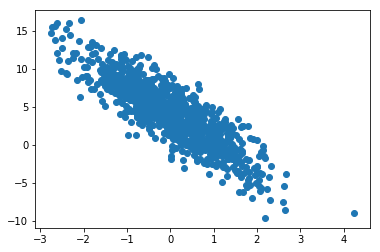

In [4]:
%pylab inline 
import matplotlib.pyplot as plt
plt.scatter(X[:, 1].asnumpy(),y.asnumpy())
plt.show()

## 读取数据

In [9]:
import sys

import numpy as np

sys.path.append('E:/xinlib')
import xinet

In [11]:
xinet.DataLoader??